In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt





/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_15257/211723862.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval=interval, period=PERIOD)
[*********************100%***********************]  1 of 1 completed


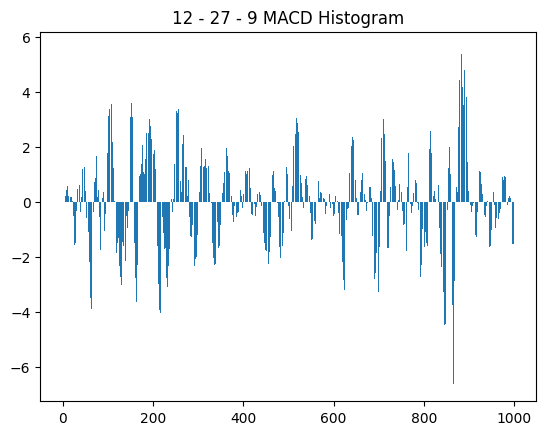

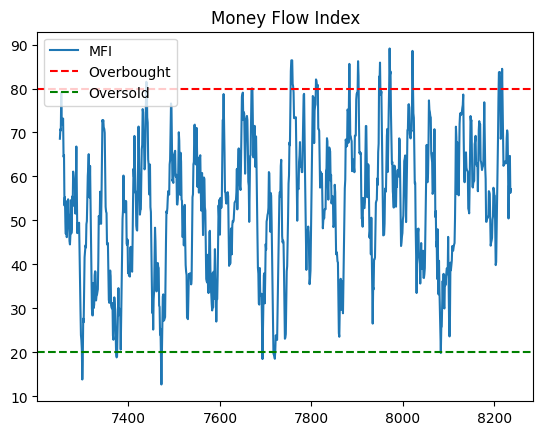

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_hist,...,Price_Change,Pos_Flow,Neg_Flow,MFI,MACD_Strategy,MFI_Strategy,Full_Strategy,Strategy,Asset_Returns,Strategy_Returns
7250,438.444946,439.881962,438.426049,439.806315,34848500,438.861768,437.883514,0.978254,0.936181,0.042073,...,-0.072563,0.000000e+00,1.529562e+10,68.582747,NaN,NaN,NaN,0,NaN,NaN
7251,441.753815,442.311593,438.766369,439.721225,53466700,439.346236,438.295527,1.050709,0.959922,0.090787,...,2.026273,2.357582e+10,0.000000e+00,70.758528,1.0,-1.0,0.0,0,0.007547,0.000000
7252,441.905029,443.209676,440.770575,443.048976,46980500,439.769096,438.666773,1.102324,0.989227,0.113096,...,1.017835,2.076358e+10,0.000000e+00,70.459510,1.0,-1.0,0.0,0,0.007892,0.000000
7253,443.654053,444.797970,441.564742,441.640361,48857500,440.403872,439.164099,1.239773,1.040491,0.199283,...,1.377162,2.166043e+10,0.000000e+00,79.117382,1.0,-1.0,0.0,0,0.011881,0.000000
7254,442.576324,443.568976,441.952362,443.389349,47858300,440.755479,439.495001,1.260479,1.085295,0.175183,...,-0.639701,0.000000e+00,2.118683e+10,72.559267,1.0,-1.0,0.0,0,0.009423,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,663.039978,665.130005,659.770020,660.650024,79560500,664.929824,660.260129,4.669694,6.210895,-1.541201,...,2.709981,5.272050e+10,0.000000e+00,57.914572,-1.0,0.0,-1.0,0,0.512254,-0.070237
8233,662.229980,665.830017,653.169983,657.169983,88779600,664.514463,660.400833,4.113630,5.791442,-1.677812,...,-2.236674,0.000000e+00,5.863094e+10,56.839599,-1.0,0.0,-1.0,0,0.510406,-0.070237
8234,665.169983,670.229980,658.929993,666.820007,81702600,664.615312,660.741487,3.873826,5.407919,-1.534093,...,4.366659,5.431398e+10,0.000000e+00,64.672507,-1.0,0.0,-1.0,0,0.517112,-0.070237
8235,660.640015,668.710022,657.109985,666.820007,110563300,664.003728,660.734239,3.269489,4.980233,-1.710743,...,-2.623311,0.000000e+00,7.320986e+10,56.254372,-1.0,-1.0,-2.0,-1,0.506780,-0.063905


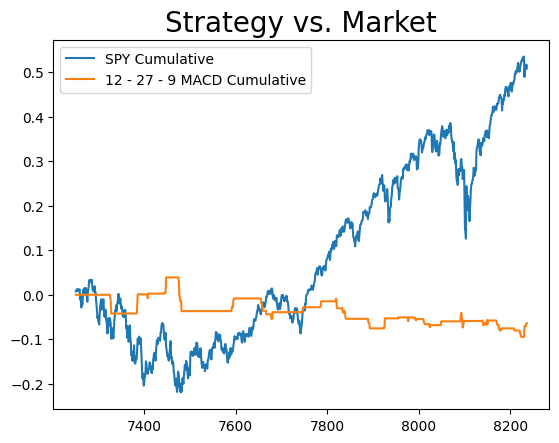

In [2]:
TICKER = 'SPY'
INTERVAL='1d'

# set period based on interval
if INTERVAL == '1h':
    PERIOD = '730d'
else:
    PERIOD = 'max'

MFI_LENGTH = 14
OVERBOUGHT = 60
OVERSOLD = 40
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9

# what subsetion of that data are you interested in
LOOKBACK = 1000

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):

    # get data at interval you want
    df = yf.download(ticker, interval=interval, period=PERIOD)
    df.columns = df.columns.get_level_values(0)

    # reset the index to make plots prettier
    df = df.reset_index(drop=True)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):

    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # macd line is the difference betweent he fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']

    # macd signal is a 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    # MACD histogram is almost always what is used in TA
    df['MACD_hist'] = df['MACD'] - df['Signal']

    # plot the histogram
    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')

    return df

def add_MACD_strategy(df):

    df['MACD_Strategy'] = 0
    df['MACD_Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['MACD_Strategy'] = df['MACD_Strategy'].shift(1)
    return df

def add_MFI(df, length=14, overbought=80, oversold=20):
    df = df.copy()

    # Step 1: Calculate typical price
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

    # Step 2: Calculate raw money flow
    df['Raw_Money_Flow'] = df['Typical_Price'] * df['Volume']

    # Step 3: Classify positive/negative money flow
    df['Price_Change'] = df['Typical_Price'].diff()

    df['Pos_Flow'] = np.where(df['Price_Change'] > 0, df['Raw_Money_Flow'], 0)
    df['Neg_Flow'] = np.where(df['Price_Change'] < 0, df['Raw_Money_Flow'], 0)

    # Step 4: Money Flow Ratio and MFI
    pos_sum = df['Pos_Flow'].rolling(window=length).sum()
    neg_sum = df['Neg_Flow'].rolling(window=length).sum()
    mfr = pos_sum / neg_sum
    df['MFI'] = 100 - (100 / (1 + mfr))

    # Step 5: Plot
    plt.figure()
    plt.plot(df['MFI'], label='MFI')
    plt.axhline(overbought, color='red', linestyle='--', label='Overbought')
    plt.axhline(oversold, color='green', linestyle='--', label='Oversold')
    plt.title('Money Flow Index')
    plt.legend()
    plt.show()

    return df.dropna()

def add_MFI_strategy(df, overbought=OVERBOUGHT, oversold=OVERSOLD):

    df['MFI_Strategy'] = 0
    df['MFI_Strategy'] = np.where(df['MFI'] > overbought, -1, 
                     np.where(df['MFI'] < oversold, 1, 0))
    
    # shift back to make sure we have seen the signal
    df['MFI_Strategy'] = df['MFI_Strategy'].shift(1)
    return df

def add_full_strategy(df):

    df['Full_Strategy'] = df['MACD_Strategy'] + df['MFI_Strategy']

    # adjust values for simplicity
    df['Strategy'] = np.where(df['Full_Strategy'] == 2, 1, 
                     np.where(df['Full_Strategy'] == -2, -1, 0))

    return df

def test_strategy(df):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Cumulative'])
    plt.title('Strategy vs. Market', size='20')

    return df

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_MFI(df)
    df = add_MACD_strategy(df)
    df = add_MFI_strategy(df)
    df = add_full_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df